In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
letter_to_num = {'Alef': 0,
 'Ayin': 1,
 'Bet': 2,
 'Dalet': 3,
 'Gimel': 4,
 'He': 5,
 'Het': 6,
 'Kaf': 7,
 'Kaf-final': 8,
 'Lamed': 9,
 'Mem': 10,
 'Mem-medial': 11,
 'Nun-final': 12,
 'Nun-medial': 13,
 'Pe': 14,
 'Pe-final': 15,
 'Qof': 16,
 'Resh': 17,
 'Samekh': 18,
 'Shin': 19,
 'Taw': 20,
 'Tet': 21,
 'Tsadi-final': 22,
 'Tsadi-medial': 23,
 'Waw': 24,
 'Yod': 25,
 'Zayin': 26,
 'Multi-letter':27,
 'Noise':28}

In [ ]:
def load_data(data_path):
    n_datapoints = 0
    image_w = 28
    image_h = 28
    
    for letter in [x for x in os.listdir(data_path)if not x.startswith(".")]:
        for file in [x for x in os.listdir(data_path+letter) if not x.startswith(".")]:
            n_datapoints +=1 

    
    x = np.zeros([n_datapoints,image_w,image_h])
    y = np.zeros([n_datapoints])
    
    index_count = 0
    for letter in [x for x in os.listdir(data_path)if not x.startswith(".")]:
        for file in [x for x in os.listdir(data_path+letter) if not x.startswith(".")]:
            img = cv2.imread(data_path+letter+"/"+file,0)
            
            x[index_count] = img
            y[index_count] = letter_to_num[letter]
            
            index_count+=1
            
    return x,y
            
  

In [4]:
x_train,y_train = load_data("/Users/Karlsson/Documents/Skola/Handwriting_Recognition/Classification_Improved/Data/Augmented_Data_Not_Thinned/Train_Data/")
x_test,y_test = load_data("/Users/Karlsson/Documents/Skola/Handwriting_Recognition/Classification_Improved/Data/Augmented_Data_Not_Thinned/Test_Data/")

In [13]:
all_data = np.append(x_train,x_test,axis=0)
all_labels = np.append(y_train, y_test)

In [14]:
np.shape(all_data)

(23661, 28, 28)

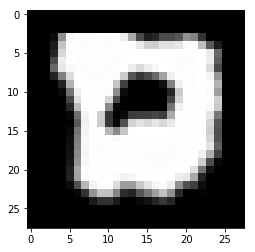

In [15]:
plt.imshow(all_data[2250],cmap="gray")

In [16]:
batch_size = 128
num_classes = 29
epochs = 24

In [17]:
img_rows, img_cols = 28, 28

In [18]:
if K.image_data_format() == 'channels_first':
    all_data = all_data.reshape(all_data.shape[0],1,img_rows,img_cols)
    #x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    #x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    all_data = all_data.reshape(all_data.shape[0],img_rows,img_cols,1)
    #x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    #x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [19]:
all_data = all_data.astype('float32')
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
all_data /= 255
#x_train /= 255
#x_test /= 255
print('data shape:', x_train.shape)
print(all_data.shape[0], ' samples')
#print('x_train shape:', x_train.shape)
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')

data shape: (17809, 28, 28)
23661  samples


In [20]:
all_labels = keras.utils.to_categorical(all_labels,num_classes)
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

In [21]:
model = None
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [22]:
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(all_data)
#datagen.fit(x_train)



In [23]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
# fits the model on batches with real-time data augmentation:
#model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
#                    validation_data=datagen.flow(x_test,y_test,batch_size=batch_size),\
#                    epochs=epochs)
model.fit_generator(datagen.flow(all_data, all_labels, batch_size=batch_size),epochs=epochs)

#model.fit(x_train, y_train,
#          batch_size=batch_size,
#          epochs=epochs,
#          verbose=1,
#          validation_data=(x_test, y_test))


Epoch 1/24
185/185 [==============================] - 46s 249ms/step - loss: 1.8192 - acc: 0.4557
Epoch 2/24
185/185 [==============================] - 51s 275ms/step - loss: 0.8292 - acc: 0.7338
Epoch 3/24
185/185 [==============================] - 53s 288ms/step - loss: 0.6454 - acc: 0.7905
Epoch 4/24
185/185 [==============================] - 50s 272ms/step - loss: 0.5531 - acc: 0.8156
Epoch 5/24
185/185 [==============================] - 53s 289ms/step - loss: 0.4999 - acc: 0.8333
Epoch 6/24
185/185 [==============================] - 48s 258ms/step - loss: 0.4484 - acc: 0.8489
Epoch 7/24
185/185 [==============================] - 45s 241ms/step - loss: 0.4178 - acc: 0.8586
Epoch 8/24
185/185 [==============================] - 60s 326ms/step - loss: 0.3908 - acc: 0.8661
Epoch 9/24
185/185 [==============================] - 51s 275ms/step - loss: 0.3656 - acc: 0.8736
Epoch 10/24
185/185 [==============================] - 54s 294ms/step - loss: 0.3535 - acc: 0.8788
Epoch 11/24
185/185

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
score = model.evaluate_generator(datagen.flow(x_test,y_test))
print(score)

In [24]:
model.save("Models/improved_augmented_cnn_v6.h5")

In [ ]:
p = model.predict_generator(datagen.flow(x_test[i:i+1,:,:,:],batch_size=1),workers=0,verbose=1)

In [ ]:
np.shape(p)

In [ ]:
x= x_test[2].reshape(1,28,28,1)
p = model.predict_generator(datagen.flow(x,batch_size=1),workers=0,verbose=0)

In [ ]:
p

acc: 0.9679218967921897


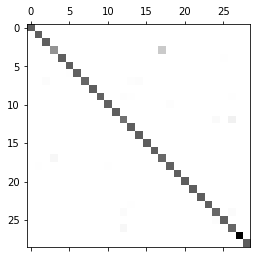

In [34]:
cm = np.zeros([29,29])

for i in range(len(all_labels)):
    
    x = all_data[i].reshape(1,28,28,1)
    #x = x_test[i].reshape(1,28,28,1)
    
    p = model.predict_generator(datagen.flow(x,batch_size=1),workers=0,verbose=0)
    
    
    top = np.argsort(-p)[0][0]
   
    cm[int(np.argmax(all_labels[i])),top] += 1
    
print("acc: {}".format(np.sum(np.diag(cm))/len(all_labels)))
plt.matshow(cm,cmap="binary")
plt.show()
        

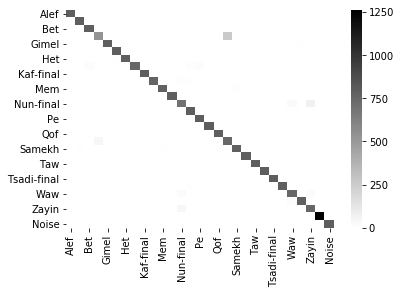

In [35]:
import pandas as pd
f_cm = pd.DataFrame(cm, index = letter_to_num.keys(),
                  columns = letter_to_num.keys())
import seaborn as sn
sn.heatmap(f_cm,cmap = "binary")

In [ ]:
model.predict_generator(datagen.flow(x_test,y_test,batch_size=1))

In [ ]:
datagen.flow(x_test)

In [ ]:
np.shape(x_test)

In [ ]:
print(np.max(model.predict_proba(x_test[0:1])))

In [ ]:
plt.imshow((x_test[0,:,:,0]))

In [25]:
print(datagen.mean)
print(datagen.std)

[[[ 0.18548644]]]
[[[ 0.35560286]]]


In [ ]:
f_cm.to_csv("cm")